In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests, coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Load the data
data = pd.read_csv(r"C:\Users\Shobhan Sarkar\OneDrive\Desktop\IITK 3rd\ECO764_2024\Week1_case_study\Data_from_2017.csv")

# Display the first few rows to understand the structure
print(data.head())

     Period  Futures price (₹/kilogram)  Spot price (₹/kilogram) expiration  \
0  01-01-17                      1027.6                   1128.0   31-01-17   
1  02-01-17                      1068.4                   1151.7   01-02-17   
2  03-01-17                      1052.0                   1139.7   02-02-17   
3  04-01-17                      1042.1                   1127.8   03-02-17   
4  05-01-17                      1042.7                   1126.5   04-02-17   

   Time_to_Maturity  Futures_theoretical  Futures_theoretical_round  \
0          0.082192          1133.576479                     1133.6   
1          0.082192          1157.393644                     1157.4   
2          0.082192          1145.334320                     1145.3   
3          0.082192          1133.375490                     1133.4   
4          0.082192          1132.069063                     1132.1   

   Deviation  Percentage_deviation  Percentage_deviation_round  ...  \
0     -106.0             -9

In [15]:
data = data.rename(columns={
    'Futures price (₹/kilogram)': 'Futures_Price',
    'Spot price (₹/kilogram)': 'Spot_Price',
    'Preiod': 'Date'
})


# Try to parse dates with mixed formats
data['Period'] = pd.to_datetime(data['Period'], errors='coerce', dayfirst=True)


C:\Users\Shobhan Sarkar\AppData\Local\Temp\ipykernel_17788\2850225765.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Period'] = pd.to_datetime(data['Period'], errors='coerce', dayfirst=True)


In [16]:
print(data['Period'].head(10))

0   2017-01-01
1   2017-01-02
2   2017-01-03
3   2017-01-04
4   2017-01-05
5   2017-01-06
6   2017-01-07
7   2017-01-08
8   2017-01-09
9   2017-01-10
Name: Period, dtype: datetime64[ns]


In [17]:
print(data.columns)

Index(['Period', 'Futures_Price', 'Spot_Price', 'expiration',
       'Time_to_Maturity', 'Futures_theoretical', 'Futures_theoretical_round',
       'Deviation', 'Percentage_deviation', 'Percentage_deviation_round',
       'Basis', 'Backwardation', 'actual<theoretical_futures_price',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')


In [18]:
# Descriptive statistics
descriptive_stats = data.describe()
print(descriptive_stats)

# Correlation between spot and futures prices
correlation = data['Spot_Price'].corr(data['Futures_Price'])
print(f"Correlation: {correlation}")

# Volatility (standard deviation of returns)
data['Spot_Returns'] = data['Spot_Price'].pct_change()
data['Futures_Returns'] = data['Futures_Price'].pct_change()
volatility_spot = data['Spot_Returns'].std()
volatility_futures = data['Futures_Returns'].std()
print(f"Volatility (Spot): {volatility_spot}")
print(f"Volatility (Futures): {volatility_futures}")

                    Period  Futures_Price   Spot_Price  Time_to_Maturity  \
count                 1404     1404.00000  1404.000000      1.404000e+03   
mean   2018-12-03 12:00:00     1288.76688  1431.761467      8.219178e-02   
min    2017-01-01 00:00:00      874.50000   996.800000      8.219178e-02   
25%    2017-12-17 18:00:00     1044.72500  1160.150000      8.219178e-02   
50%    2018-12-03 12:00:00     1257.30000  1391.200000      8.219178e-02   
75%    2019-11-19 06:00:00     1505.27500  1679.625000      8.219178e-02   
max    2020-11-04 00:00:00     1923.20000  2117.300000      8.219178e-02   
std                    NaN      257.10864   276.490168      2.151824e-15   

       Futures_theoretical  Futures_theoretical_round    Deviation  \
count          1404.000000                1404.000000  1404.000000   
mean           1438.839647                1438.839744  -150.072863   
min            1001.727867                1001.700000  -331.100000   
25%            1165.885418         

C:\Users\Shobhan Sarkar\AppData\Local\Temp\ipykernel_17788\773309162.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Spot_Returns'] = data['Spot_Price'].pct_change()
C:\Users\Shobhan Sarkar\AppData\Local\Temp\ipykernel_17788\773309162.py:11: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Futures_Returns'] = data['Futures_Price'].pct_change()


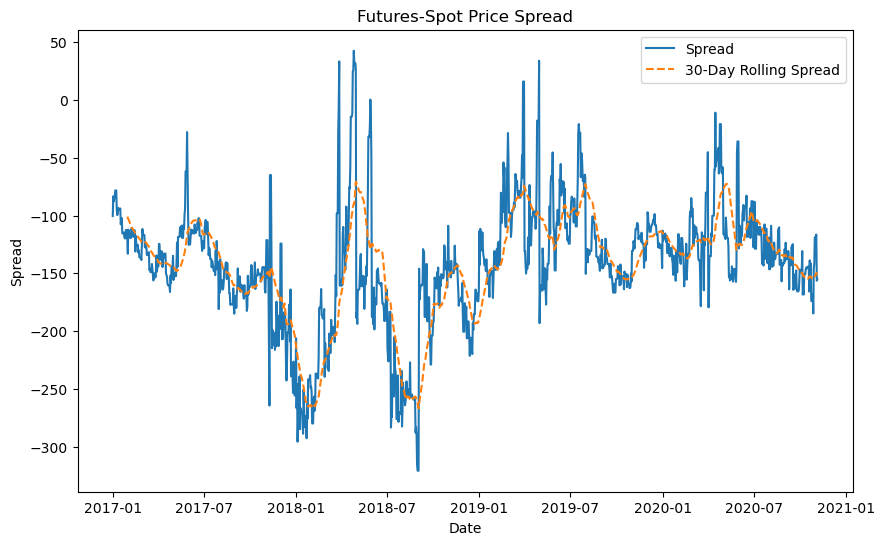

In [29]:
# Calculate the spread between futures and spot prices
data['Spread'] = data['Futures_Price'] - data['Spot_Price']

# Rolling window analysis of the spread
data['Spread_Rolling'] = data['Spread'].rolling(window=30).mean()

# Plot the spread
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Period'], data['Spread'], label='Spread')
plt.plot(data['Period'], data['Spread_Rolling'], label='30-Day Rolling Spread', linestyle='--')
plt.legend()
plt.title('Futures-Spot Price Spread')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.savefig('Futures-Spot_Price_Spread_2017_to_2020')
plt.show()

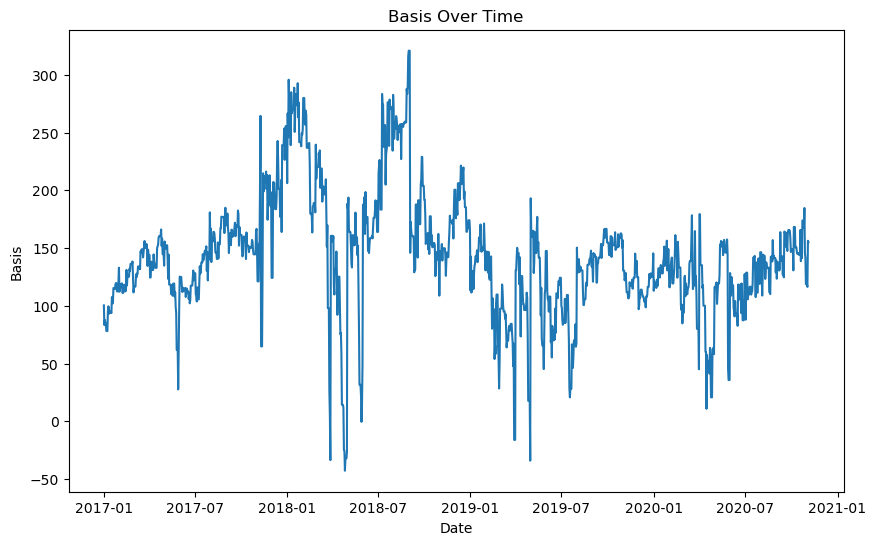

In [20]:
# Calculate the basis
data['Basis'] = data['Spot_Price'] - data['Futures_Price']

# Basis trend over time
plt.figure(figsize=(10, 6))
plt.plot(data['Period'], data['Basis'])
plt.title('Basis Over Time')
plt.xlabel('Date')
plt.ylabel('Basis')
plt.savefig('Futures-Spot_Price_Spread_2017_to_2020')
plt.show()

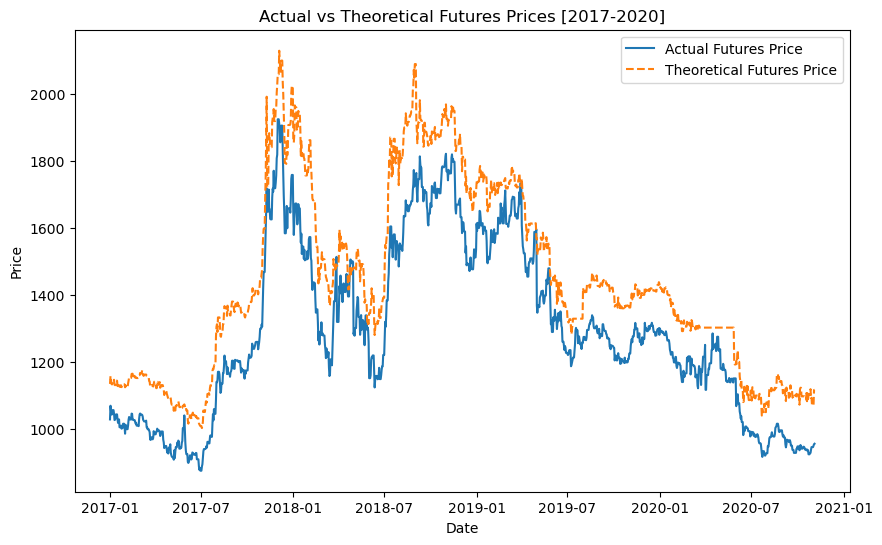

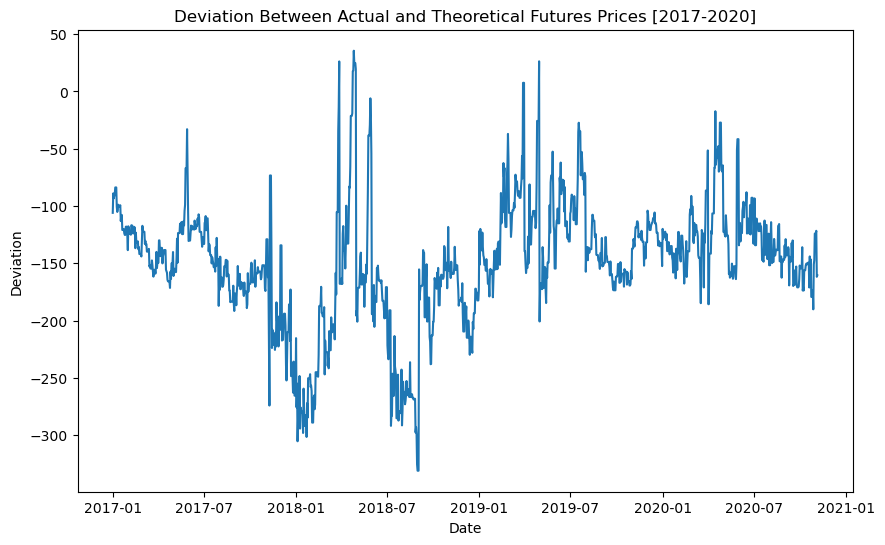

In [27]:
import numpy as np
risk_free_rate = 0.05  # Example risk-free rate
storage_cost = 0.02    # Example storage cost per year
convenience_yield = 0.01 # Example convenience yield
T = 30/365  # Time to maturity in years (e.g., 30 days)

# Calculate theoretical futures prices
data['Theoretical_Futures_Price'] = data['Spot_Price'] * np.exp((risk_free_rate + storage_cost - convenience_yield) * T)

# Compare with actual futures prices
plt.figure(figsize=(10, 6))
plt.plot(data['Period'], data['Futures_Price'], label='Actual Futures Price')
plt.plot(data['Period'], data['Theoretical_Futures_Price'], label='Theoretical Futures Price', linestyle='--')
plt.legend()
plt.title('Actual vs Theoretical Futures Prices [2017-2020]')
plt.xlabel('Date')
plt.ylabel('Price')
plt.savefig('Actual and Theoretical futures Prices[2017-2020]')
plt.show()

# Calculate and plot the deviation
data['Deviation'] = data['Futures_Price'] - data['Theoretical_Futures_Price']

plt.figure(figsize=(10, 6))
plt.plot(data['Period'], data['Deviation'])
plt.title('Deviation Between Actual and Theoretical Futures Prices [2017-2020]')
plt.xlabel('Date')
plt.ylabel('Deviation')
plt.savefig('Deviation between Actual and Theoretical Futures Prices[2017-2020]')
plt.show()

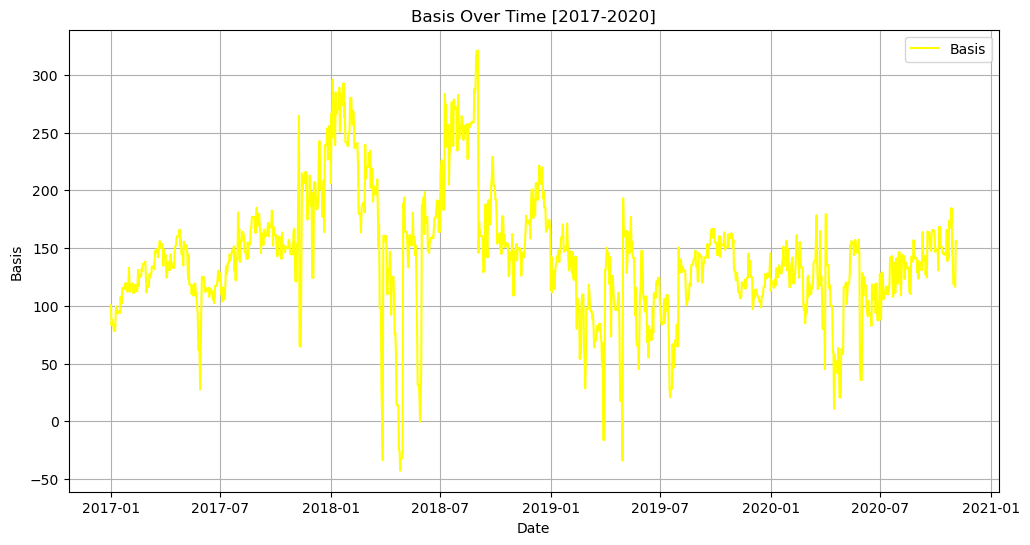

In [28]:
data['Basis'] = data['Spot_Price'] - data['Futures_Price']

# Plot the basis over time
plt.figure(figsize=(12, 6))
plt.plot(data['Period'], data['Basis'], label='Basis', color='Yellow')
plt.xlabel('Date')
plt.ylabel('Basis')
plt.title('Basis Over Time [2017-2020]')
plt.legend()
plt.grid(True)
plt.savefig('Basis[2017-2020]')
plt.show()

In [30]:
df1 = pd.read_csv(r"C:\Users\Shobhan Sarkar\OneDrive\Desktop\IITK 3rd\ECO764_2024\Week1_case_study\Data_from_2017.csv")

In [31]:
df1.head

<bound method NDFrame.head of         Period  Futures price (₹/kilogram)  Spot price (₹/kilogram)  \
0     01-01-17                      1027.6                   1128.0   
1     02-01-17                      1068.4                   1151.7   
2     03-01-17                      1052.0                   1139.7   
3     04-01-17                      1042.1                   1127.8   
4     05-01-17                      1042.7                   1126.5   
...        ...                         ...                      ...   
1401  02-11-20                       949.3                   1065.7   
1402  03-11-20                       953.7                   1110.0   
1403  04-11-20                       955.0                   1110.0   
1404       NaN                         NaN                      NaN   
1405       NaN                         NaN                      NaN   

     expiration  Time_to_Maturity  Futures_theoretical  \
0      31-01-17          0.082192          1133.576479   
1

In [32]:
df1 = pd.read_csv(r"C:\Users\Shobhan Sarkar\OneDrive\Desktop\IITK 3rd\ECO764_2024\Week1_case_study\2017_2021.csv")

In [33]:
df1.head

<bound method NDFrame.head of           Period  Futures price (₹/kilogram)  Spot price (₹/kilogram)
0     01-01-2017                      1027.6                   1128.0
1     02-01-2017                      1068.4                   1151.7
2     03-01-2017                      1052.0                   1139.7
3     04-01-2017                      1042.1                   1127.8
4     05-01-2017                      1042.7                   1126.5
...          ...                         ...                      ...
1399  31-10-2020                       945.0                   1063.8
1400  01-11-2020                       945.0                   1063.8
1401  02-11-2020                       949.3                   1065.7
1402  03-11-2020                       953.7                   1110.0
1403  04-11-2020                       955.0                   1110.0

[1404 rows x 3 columns]>

In [34]:
df1.describe()

,Futures price (₹/kilogram),Spot price (₹/kilogram)
count,1404.00000,1404.000000
mean,1288.76688,1431.761467
std,257.10864,276.490168
min,874.50000,996.800000
25%,1044.72500,1160.150000
50%,1257.30000,1391.200000
75%,1505.27500,1679.625000
max,1923.20000,2117.300000


In [38]:
max_lag = 10
granger_test = grangercausalitytests(df1[['Futures price (₹/kilogram)', 'Spot price (₹/kilogram)']].dropna(), max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=24.8345 , p=0.0000  , df_denom=1400, df_num=1
ssr based chi2 test:   chi2=24.8877 , p=0.0000  , df=1
likelihood ratio test: chi2=24.6696 , p=0.0000  , df=1
parameter F test:         F=24.8345 , p=0.0000  , df_denom=1400, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.2641 , p=0.0000  , df_denom=1397, df_num=2
ssr based chi2 test:   chi2=28.6303 , p=0.0000  , df=2
likelihood ratio test: chi2=28.3418 , p=0.0000  , df=2
parameter F test:         F=14.2641 , p=0.0000  , df_denom=1397, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.5803 , p=0.0000  , df_denom=1394, df_num=3
ssr based chi2 test:   chi2=31.9002 , p=0.0000  , df=3
likelihood ratio test: chi2=31.5424 , p=0.0000  , df=3
parameter F test:         F=10.5803 , p=0.0000  , df_denom=1394, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.6106  , p=0.

C:\Users\Shobhan Sarkar\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [39]:
def johansen_test(df, column1, column2):
    coint_test = coint_johansen(df[[column1, column2]], det_order=0, k_ar_diff=1)
    return coint_test.lr1, coint_test.cvt

coint_test_stat, coint_critical_values = johansen_test(df1, 'Futures price (₹/kilogram)', 'Spot price (₹/kilogram)')
print(f'Co-integration Test Statistic: {coint_test_stat}')
print(f'Critical Values: {coint_critical_values}')


Co-integration Test Statistic: [56.69494868  2.17643901]
Critical Values: [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
